## 0) Setup

In [2]:
import os
import math
import numpy as np
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix

# Display options
pd.set_option("display.max_columns", 300)
pd.set_option("display.width", 120)

# ---- Path to your CSV ----
DATA_PATH = "../data/1_Recipe.csv"  

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

## 1) Load Data

In [3]:
if os.path.exists(DATA_PATH):
    df = pd.read_csv(DATA_PATH,low_memory=False)
    source_note = f"Loaded dataset from: {DATA_PATH}"

source_note, df.head()    

('Loaded dataset from: ../data/1_Recipe.csv',
                                         recipe_title           category        subcategory  \
 0         Air Fryer Potato Slices with Dipping Sauce  Air Fryer Recipes  Air Fryer Recipes   
 1                         Gochujang Pork Belly Bites  Air Fryer Recipes  Air Fryer Recipes   
 2  3-Ingredient Air Fryer Everything Bagel Chicke...  Air Fryer Recipes  Air Fryer Recipes   
 3         Air Fryer Everything Bagel Chicken Cutlets  Air Fryer Recipes  Air Fryer Recipes   
 4              Air Fryer Honey Sriracha Salmon Bites  Air Fryer Recipes  Air Fryer Recipes   
 
                                          description                                        ingredients  \
 0  These air fryer potato slices, served with a b...  ["3/4 cup ketchup", "1/2 cup beer", "1 tablesp...   
 1  These gochujang pork belly bites are sweet and...  ["1 pound pork belly", "1/4 cup gochujang", "2...   
 2  These 3-ingredient air fryer everything bagel ...  ["1

## 2) First Look

In [ ]:
print(source_note)
print("/nShape:", df.shape)
print("/nColumns:", list(df.columns))
print("/nInfo:")
print(df.info())
display(df.head(10))

Loaded dataset from: ../data/1_Recipe.csv

Shape: (62126, 8)

Columns: ['recipe_title', 'category', 'subcategory', 'description', 'ingredients', 'directions', 'num_ingredients', 'num_steps']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62126 entries, 0 to 62125
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   recipe_title     62126 non-null  object
 1   category         62126 non-null  object
 2   subcategory      62126 non-null  object
 3   description      62126 non-null  object
 4   ingredients      62126 non-null  object
 5   directions       62126 non-null  object
 6   num_ingredients  62126 non-null  int64 
 7   num_steps        62126 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 3.8+ MB
None


,recipe_title,category,subcategory,description,ingredients,directions,num_ingredients,num_steps
0,Air Fryer Potato Slices with Dipping Sauce,Air Fryer Recipes,Air Fryer Recipes,"These air fryer potato slices, served with a b...","[""3/4 cup ketchup"", ""1/2 cup beer"", ""1 tablesp...","[""Combine ketchup, beer, Worcestershire sauce,...",9,5
1,Gochujang Pork Belly Bites,Air Fryer Recipes,Air Fryer Recipes,These gochujang pork belly bites are sweet and...,"[""1 pound pork belly"", ""1/4 cup gochujang"", ""2...","[""Preheat an air fryer to 400 degrees F (200 d...",5,4
2,3-Ingredient Air Fryer Everything Bagel Chicke...,Air Fryer Recipes,Air Fryer Recipes,These 3-ingredient air fryer everything bagel ...,"[""1 \u00bc pounds chicken tenders"", ""1 tablesp...","[""Gather all ingredients. Preheat an air fryer...",3,4
3,Air Fryer Everything Bagel Chicken Cutlets,Air Fryer Recipes,Air Fryer Recipes,These air fryer everything bagel chicken cutle...,"[""4 chicken cutlets (about 1 pound total)"", ""s...","[""Preheat an air fryer to 400 degrees F (200 d...",9,9
4,Air Fryer Honey Sriracha Salmon Bites,Air Fryer Recipes,Air Fryer Recipes,These air fryer honey Sriracha salmon bites ar...,"[""1 tablespoon soy sauce"", ""1 tablespoon honey...","[""Preheat an air fryer to 400 degrees F (200 d...",5,5
5,Air Fryer Corn on The Cob,Air Fryer Recipes,Air Fryer Recipes,Air fryer corn on the cob is super quick to ma...,"[""\u00bc cup mayonnaise"", ""2 teaspoons crumble...","[""Preheat an air fryer to 400 degrees F (200 d...",6,4
6,Air Fryer Peanut Chicken,Air Fryer Recipes,Air Fryer Recipes,"In this air fryer peanut chicken recipe, bonel...","[""2 tablespoons Thai sweet chili sauce"", ""1 ta...","[""Combine chili sauce, soy sauce, Sriracha, li...",13,7
7,Air Fryer Crispy Onions,Air Fryer Recipes,Air Fryer Recipes,These air fryer crispy onions are delicious ov...,"[""1/4 cup all-purpose flour"", ""1/2 teaspoon ca...","[""Preheat an air fryer to 375 degrees F (190 d...",5,3
8,Air Fryer Hot Honey Glazed Carrots,Air Fryer Recipes,Air Fryer Recipes,These air fryer hot honey glazed carrots are a...,"[""nonstick cooking spray"", ""2 tablespoons butt...","[""Preheat an air fryer to 400 degrees F (200 d...",4,3
9,Air Fryer Sauteed Onions,Air Fryer Recipes,Air Fryer Recipes,"Air fryer sauteed onions add a lot to burgers,...","[""1 large onion"", ""1 1/2 teaspoons olive oil"",...","[""Preheat an air fryer to 400 degrees F (200 d...",3,3


## 3) Knowing the Data Type

In [6]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
datetime_cols = df.select_dtypes(include=["datetime64[ns]", "datetime64[ns, UTC]"]).columns.tolist()
categorical_cols = [c for c in df.columns if c not in numeric_cols + datetime_cols]

print("Numeric:", numeric_cols)
# Print a line to separate long lists
print("-" * 40)
print("Datetime:", datetime_cols)
print("-" * 40)
print("Categorical/Other:", categorical_cols)

Numeric: ['num_ingredients', 'num_steps']
----------------------------------------
Datetime: []
----------------------------------------
Categorical/Other: ['recipe_title', 'category', 'subcategory', 'description', 'ingredients', 'directions']


## 4) Descriptive Statistics

In [7]:
numeric_summary = df[numeric_cols].describe().T if numeric_cols else pd.DataFrame()
categorical_summary = pd.DataFrame({
    "n_unique": [df[c].nunique(dropna=True) for c in categorical_cols],
    "top_values": [df[c].value_counts(dropna=False).head(5).to_dict() for c in categorical_cols]
}, index=categorical_cols) if categorical_cols else pd.DataFrame()

display(numeric_summary.head(5))
display(categorical_summary.head(5))

,count,mean,std,min,25%,50%,75%,max
num_ingredients,62126.0,9.017448,3.830323,1.0,6.0,9.0,11.0,35.0
num_steps,62126.0,4.661865,2.310253,1.0,3.0,4.0,6.0,25.0


,n_unique,top_values
recipe_title,24971,"{'Blackened Chicken': 26, 'Baked Sweet Potatoe..."
category,267,"{'Main Dishes': 3387, 'Healthy Recipes': 2237,..."
subcategory,1032,"{'Meatloaf': 320, 'Lasagna': 248, 'Pizza': 233..."
description,25015,{'Blackened chicken is quick and easy to make ...
ingredients,24971,"{'[""cooking spray""]': 72, '[""\u00bd teaspoon p..."


## 5) Missingness Overview

In [8]:
missing = df.isna().mean().sort_values(ascending=False)
missing = (missing * 100).round(2).rename("%missing")
display(missing.to_frame().head(30))

,%missing
recipe_title,0.0
category,0.0
subcategory,0.0
description,0.0
ingredients,0.0
directions,0.0
num_ingredients,0.0
num_steps,0.0


## 6) Duplicate Awareness

In [9]:
dup_count = int(df.duplicated().sum())
total = len(df)
print(f"Duplicated rows: {dup_count} / {total} ({dup_count/total*100:.2f}%)")

Duplicated rows: 0 / 62126 (0.00%)


## 7) Cleaning Data

In [ ]:
ING_COL = "ingredients"
units = [
    "cup","cups","tablespoon","tablespoons","tbsp","teaspoon",
    "teaspoons","tsp","pound","pounds","lb","lbs","oz",
    "ounce","ounces","gram","grams","kg","pinch","dash",
    "stick","sticks","ml","ltr"
]
unit_pattern = r"|".join(map(re.escape, units))
leading_pattern = re.compile(
    rf"^/s*/d+(?://d+)?/s*(?:{unit_pattern})?/b(?:/s+of/b)?/s*",
    flags=re.IGNORECASE
)
paren_pattern = re.compile(r"/s*/([^)]*/)")

In [11]:
def clean_ing(x):
    if not isinstance(x, str):
        return ""
    x = x.replace(",", "")
    x = paren_pattern.sub("", x)
    x = leading_pattern.sub("", x)
    return x.strip()

In [12]:
def normalize(cell):
    if pd.isna(cell):
        return []
    if isinstance(cell, str) and cell.strip().startswith("["):
        try:
            lst = ast.literal_eval(cell)
        except:
            lst = [cell]
    elif "," in cell:
        lst = [i.strip() for i in cell.split(",")]
    else:
        lst = [cell]
    return [clean_ing(i) for i in lst if clean_ing(i)]

In [13]:
df["clean"] = df[ING_COL].apply(normalize)
df_long = df.explode("clean")
df_long = df_long[df_long["clean"].str.len() > 0]

print(df_long["clean"].head())

0                 ketchup
0                    beer
0    Worcestershire sauce
0            onion powder
0                 cayenne
Name: clean, dtype: object


In [ ]:
## FREQUENCY ANALYSIS

freq = df_long["clean"].value_counts()
print("/nTOP 20 INGREDIENTS:")
print(freq.head(20))


TOP 20 INGREDIENTS:
clean
salt                                     10075
white sugar                               8748
all-purpose flour                         7331
vanilla extract                           7053
olive oil                                 6174
½ teaspoon salt                           5365
water                                     5226
large eggs                                4911
butter                                    4686
baking powder                             4112
eggs                                      3932
cloves garlic minced                      3904
ground cinnamon                           3813
vegetable oil                             3583
baking soda                               3364
salt and ground black pepper to taste     3218
milk                                      3186
¼ teaspoon salt                           2952
cooking spray                             2952
ground black pepper                       2745
Name: count, dtype: int64


In [ ]:
ING_COL = "ingredients"

# Units
units = [
    "cup","cups","tablespoon","tablespoons","tbsp","teaspoon",
    "teaspoons","tsp","pound","pounds","lb","lbs","oz","ounce","ounces",
    "gram","grams","kg","pinch","dash","stick","sticks","ml","ltr"
]

unit_pattern = r"|".join(map(re.escape, units))

# FULLY upgraded regex to remove ALL quantities:
quantity_pattern = re.compile(
    r"""(
        ^/s*[aA]?/d+(?:/s*[-/]/s*/d+)?/s*      # 2, 1/2, 1-2, A1/4
        |
        [¼½¾]                                  # unicode fractions
        |
        /b/d+(?:/./d+)?/b                      # standalone numbers 2, 10, 5.5
    )""", 
    re.VERBOSE
)

# Remove parentheses content
paren_pattern = re.compile(r"/s*/([^)]*/)")

def clean_ing(x):
    if not isinstance(x, str):
        return ""

    x = paren_pattern.sub("", x)                     # Remove (optional)
    x = quantity_pattern.sub(" ", x)                 # Remove ALL quantities
    x = re.sub(rf"/b({unit_pattern})/b", " ", x)     # Remove units
    x = re.sub(r"[^a-zA-Z ]", " ", x)                # Remove leftover symbols
    x = re.sub(r"/s+", " ", x).strip().lower()       # Normalize spaces & lowercase
    
    return x

def normalize(cell):
    if pd.isna(cell):
        return []

    if isinstance(cell, str) and cell.strip().startswith("["):
        try:
            lst = ast.literal_eval(cell)
        except:
            lst = [cell]
    elif "," in cell:
        lst = [i.strip() for i in cell.split(",")]
    else:
        lst = [cell]

    return [clean_ing(i) for i in lst if clean_ing(i)]

# Apply cleaning
df["clean_list"] = df[ING_COL].apply(normalize)

# Convert to comma-separated string
df["clean_ingredients"] = df["clean_list"].apply(lambda x: ", ".join(x))

# Preview results
print(df[["recipe_title", "clean_ingredients"]].head())

# Save output
df.to_csv("cleaned_ingredients_full.csv", index=False)
print("Saved cleaned_ingredients_full.csv")

                                        recipe_title                                  clean_ingredients
0         Air Fryer Potato Slices with Dipping Sauce  ketchup, beer, worcestershire sauce, onion pow...
1                         Gochujang Pork Belly Bites  pork belly, gochujang, soy sauce, honey, groun...
2  3-Ingredient Air Fryer Everything Bagel Chicke...  chicken tenders, olive oil, everything bagel s...
3         Air Fryer Everything Bagel Chicken Cutlets  chicken cutlets, salt and freshly ground black...
4              Air Fryer Honey Sriracha Salmon Bites  soy sauce, honey, sriracha, rice vinegar, gran...
Saved cleaned_ingredients_full.csv


## Ingredient Normalization


In [16]:
df_clean = pd.read_csv("../data/cleaned_ingredients_full.csv")
df_clean.head(1)


,recipe_title,category,subcategory,description,ingredients,directions,num_ingredients,num_steps,clean,cluster,ingredient_clean,clean_list,clean_ingredients
0,Air Fryer Potato Slices with Dipping Sauce,Air Fryer Recipes,Air Fryer Recipes,"These air fryer potato slices, served with a b...","[""3/4 cup ketchup"", ""1/2 cup beer"", ""1 tablesp...","[""Combine ketchup, beer, Worcestershire sauce,...",9,5,"['ketchup', 'beer', 'Worcestershire sauce', 'o...",2,ketchup beer worcestershire sauce onion powder...,"['ketchup', 'beer', 'worcestershire sauce', 'o...","ketchup, beer, worcestershire sauce, onion pow..."


In [17]:
normalize_map = {
    "tomatoes": "tomato",
    "tomatos": "tomato",
    "chillies": "chili",
    "chilies": "chili",
    "chiles": "chili",
    "peppers": "pepper",
    "onions": "onion",
    "potatoes": "potato",
    "carrots": "carrot",
    "cloves": "clove",
    "eggs": "egg",
    "mushrooms": "mushroom",
    "berries": "berry",
    "bananas": "banana",
    "apples": "apple",
    "limes": "lime",
    "lemons": "lemon",
    "beans": "bean"
}

def normalize_word(word):
    """Normalize individual ingredient words."""
    return normalize_map.get(word.lower(), word.lower())

def normalize_ingredient(ing):
    """Normalize entire ingredient string by normalizing each word."""
    if not isinstance(ing, str):
        return ""
    words = ing.lower().split()
    normalized_words = [normalize_word(w) for w in words]
    return " ".join(normalized_words)



In [18]:
# Apply normalization
df_clean["normalized_ingredients"] = df_clean['clean_ingredients'].apply(normalize_ingredient)

# Show output
print(df_clean[["recipe_title", "ingredients", "normalized_ingredients"]].head())

# Save normalized version
df_clean.to_csv("normalized_ingredients.csv", index=False)
print("Saved normalized_ingredients.csv")

                                        recipe_title                                        ingredients  \
0         Air Fryer Potato Slices with Dipping Sauce  ["3/4 cup ketchup", "1/2 cup beer", "1 tablesp...   
1                         Gochujang Pork Belly Bites  ["1 pound pork belly", "1/4 cup gochujang", "2...   
2  3-Ingredient Air Fryer Everything Bagel Chicke...  ["1 \u00bc pounds chicken tenders", "1 tablesp...   
3         Air Fryer Everything Bagel Chicken Cutlets  ["4 chicken cutlets (about 1 pound total)", "s...   
4              Air Fryer Honey Sriracha Salmon Bites  ["1 tablespoon soy sauce", "1 tablespoon honey...   

                              normalized_ingredients  
0  ketchup, beer, worcestershire sauce, onion pow...  
1  pork belly, gochujang, soy sauce, honey, groun...  
2  chicken tenders, olive oil, everything bagel s...  
3  chicken cutlets, salt and freshly ground black...  
4  soy sauce, honey, sriracha, rice vinegar, gran...  
Saved normalized_ingredient

In [19]:
df_clean.head()

,recipe_title,category,subcategory,description,ingredients,directions,num_ingredients,num_steps,clean,cluster,ingredient_clean,clean_list,clean_ingredients,normalized_ingredients
0,Air Fryer Potato Slices with Dipping Sauce,Air Fryer Recipes,Air Fryer Recipes,"These air fryer potato slices, served with a b...","[""3/4 cup ketchup"", ""1/2 cup beer"", ""1 tablesp...","[""Combine ketchup, beer, Worcestershire sauce,...",9,5,"['ketchup', 'beer', 'Worcestershire sauce', 'o...",2,ketchup beer worcestershire sauce onion powder...,"['ketchup', 'beer', 'worcestershire sauce', 'o...","ketchup, beer, worcestershire sauce, onion pow...","ketchup, beer, worcestershire sauce, onion pow..."
1,Gochujang Pork Belly Bites,Air Fryer Recipes,Air Fryer Recipes,These gochujang pork belly bites are sweet and...,"[""1 pound pork belly"", ""1/4 cup gochujang"", ""2...","[""Preheat an air fryer to 400 degrees F (200 d...",5,4,"['pork belly', 'gochujang', 'soy sauce', 'hone...",6,pork belly gochujang soy sauce honey ground gi...,"['pork belly', 'gochujang', 'soy sauce', 'hone...","pork belly, gochujang, soy sauce, honey, groun...","pork belly, gochujang, soy sauce, honey, groun..."
2,3-Ingredient Air Fryer Everything Bagel Chicke...,Air Fryer Recipes,Air Fryer Recipes,These 3-ingredient air fryer everything bagel ...,"[""1 \u00bc pounds chicken tenders"", ""1 tablesp...","[""Gather all ingredients. Preheat an air fryer...",3,4,"['¼ pounds chicken tenders', 'olive oil', 'eve...",2,u bc pounds chicken tenders olive oil everythi...,"['chicken tenders', 'olive oil', 'everything b...","chicken tenders, olive oil, everything bagel s...","chicken tenders, olive oil, everything bagel s..."
3,Air Fryer Everything Bagel Chicken Cutlets,Air Fryer Recipes,Air Fryer Recipes,These air fryer everything bagel chicken cutle...,"[""4 chicken cutlets (about 1 pound total)"", ""s...","[""Preheat an air fryer to 400 degrees F (200 d...",9,9,"['chicken cutlets', 'salt and freshly ground b...",2,chicken cutlets about total salt and freshly g...,"['chicken cutlets', 'salt and freshly ground b...","chicken cutlets, salt and freshly ground black...","chicken cutlets, salt and freshly ground black..."
4,Air Fryer Honey Sriracha Salmon Bites,Air Fryer Recipes,Air Fryer Recipes,These air fryer honey Sriracha salmon bites ar...,"[""1 tablespoon soy sauce"", ""1 tablespoon honey...","[""Preheat an air fryer to 400 degrees F (200 d...",5,5,"['soy sauce', 'honey', 'Sriracha', 'rice vineg...",6,soy sauce honey sriracha rice vinegar granulat...,"['soy sauce', 'honey', 'sriracha', 'rice vineg...","soy sauce, honey, sriracha, rice vinegar, gran...","soy sauce, honey, sriracha, rice vinegar, gran..."


In [20]:
ING_COL = "normalized_ingredients"

NON_ESSENTIAL = [
    # basic spices & powders
    "black pepper", "paprika", "garlic powder", "onion powder", "granulated garlic",
    "ginger", "ground ginger",

    # cooking additives
    "cooking spray", "spray", "parchment",

    # sauces / condiments
    "sriracha", "hot sauce", "thai sweet chili sauce", "gochujang", "mayonnaise",

    # sweeteners
    "honey", "brown sugar",

    # liquids technically non-essential
    "vinegar", "rice vinegar", "beer",

    # garnishes
    "fresh cilantro", "cilantro", "scallions", "green onion",
    "cotija cheese"
]



In [21]:
def is_non_essential(ingredient):
    ing = ingredient.lower().strip()
    return any(word in ing for word in NON_ESSENTIAL)

# Function to split essential / non-essential
def split_ingredients(ingredient_list_str):
    if not isinstance(ingredient_list_str, str):
        return "", ""

    # Get list of ingredients (already comma-separated)
    ingredients = [i.strip() for i in ingredient_list_str.split(",")]

    essential = []
    non_essential = []

    for ing in ingredients:
        if is_non_essential(ing):
            non_essential.append(ing)
        else:
            essential.append(ing)

    return ", ".join(essential), ", ".join(non_essential)



In [22]:
# Apply to dataframe
df_clean["essential_ingredients"], df_clean["non_essential_ingredients"] = zip(
    *df_clean[ING_COL].apply(split_ingredients)
)



In [23]:
# Preview
print(df_clean[["recipe_title", "essential_ingredients", "non_essential_ingredients"]].head())

# Save output
df_clean.to_csv("recipe_with_essential_nonessential.csv", index=False)
print("Saved: recipe_with_essential_nonessential.csv")

                                        recipe_title                              essential_ingredients  \
0         Air Fryer Potato Slices with Dipping Sauce  ketchup, worcestershire sauce, cayenne, baking...   
1                         Gochujang Pork Belly Bites                              pork belly, soy sauce   
2  3-Ingredient Air Fryer Everything Bagel Chicke...  chicken tenders, olive oil, everything bagel s...   
3         Air Fryer Everything Bagel Chicken Cutlets  chicken cutlets, all purpose flour, large eggs...   
4              Air Fryer Honey Sriracha Salmon Bites                                          soy sauce   

                           non_essential_ingredients  
0  beer, onion powder, olive oil cooking spray, g...  
1                    gochujang, honey, ground ginger  
2                                                     
3  salt and freshly ground black pepper to taste,...  
4   honey, sriracha, rice vinegar, granulated garlic  
Saved: recipe_with_essentia

## Removing Duplicated Rows

In [25]:
#1. Store the original count of rows for comparison
original_row_count = len(df_clean)

#2. Remove duplicate rows based on the 'recipe_title' column.
# 'keep='first'' ensures that the first row of any duplicate set is kept.
df_deduplicated = df_clean.drop_duplicates(subset=['recipe_title'], keep='first')

#3. Store the new count of rows
new_row_count = len(df_deduplicated)

#4. Save the resulting DataFrame to a new CSV file
output_file_name = 'deduplicated_recipes.csv'
df_deduplicated.to_csv(output_file_name, index=False)

print(f"Original number of rows: {original_row_count}")
print(f"Number of rows after removing duplicates: {new_row_count}")
print(f"Removed {original_row_count - new_row_count} duplicate recipes.")
print(f"Deduplicated data saved to: {output_file_name}")

Original number of rows: 62126
Number of rows after removing duplicates: 24971
Removed 37155 duplicate recipes.
Deduplicated data saved to: deduplicated_recipes.csv


In [26]:
print(df_deduplicated.head())

                                        recipe_title           category        subcategory  \
0         Air Fryer Potato Slices with Dipping Sauce  Air Fryer Recipes  Air Fryer Recipes   
1                         Gochujang Pork Belly Bites  Air Fryer Recipes  Air Fryer Recipes   
2  3-Ingredient Air Fryer Everything Bagel Chicke...  Air Fryer Recipes  Air Fryer Recipes   
3         Air Fryer Everything Bagel Chicken Cutlets  Air Fryer Recipes  Air Fryer Recipes   
4              Air Fryer Honey Sriracha Salmon Bites  Air Fryer Recipes  Air Fryer Recipes   

                                         description                                        ingredients  \
0  These air fryer potato slices, served with a b...  ["3/4 cup ketchup", "1/2 cup beer", "1 tablesp...   
1  These gochujang pork belly bites are sweet and...  ["1 pound pork belly", "1/4 cup gochujang", "2...   
2  These 3-ingredient air fryer everything bagel ...  ["1 \u00bc pounds chicken tenders", "1 tablesp...   
3  Thes

In [ ]:
## To see the ingredients in the dataset

# Initialize a set to store all unique ingredients
all_ingredients = set()

# Iterate through the 'normalized_ingredients' column and split the strings
for ingredients_string in df_deduplicated['normalized_ingredients']:
    # Split the string by comma and strip any leading/trailing whitespace from each ingredient
    ingredients_list = [ingredient.strip() for ingredient in ingredients_string.split(',')]
    all_ingredients.update(ingredients_list)

# Convert the set to a sorted list
sorted_ingredients = sorted(list(all_ingredients))

# Create a DataFrame for the unique ingredients list
ingredients_df = pd.DataFrame(sorted_ingredients, columns=['Unique_Ingredients'])

# Save the full list of unique ingredients to a CSV file
ingredients_df.to_csv("unique_ingredients_list.csv", index=False)

# The following lines are used for displaying a output:
print(f"Total number of unique ingredients found: {len(sorted_ingredients)}")
print("/nFirst 50 unique ingredients:")
for i, ingredient in enumerate(sorted_ingredients[:50]):
 print(f"{i+1}. {ingredient}")

Total number of unique ingredients found: 32356

First 50 unique ingredients:
1. a ejo tequila
2. a lfredo sauce
3. a little olive oil for the pan
4. a of cayenne
5. ablespoon lime zest
6. ablespoon sugar free vanilla syrup
7. ablespoons verything bagel seasoning
8. absinthe
9. aby bella mushroom sliced
10. acai berry sorbet
11. acai powder
12. achiote paste
13. achiote powder
14. achiote seeds
15. acini di pepe pasta
16. acorn squash
17. acorn squash cut in half lengthwise and seeded
18. acorn squash halved and seeded
19. acorn squash halved lengthwise and seeded
20. acorn squash halved lengthwise seeded and cut into inch slices
21. acorn squash halved seeds and fibers removed
22. acorn squash peeled and cut into inch cubes
23. acorn squash seeded and cut into quarters
24. acorn squashes halved and seeded
25. activated charcoal powder
26. active dry yeast
27. active dry yeast divided
28. active dry yeast or bread machine yeast
29. active sourdough starter
30. additional chopped green 

In [32]:
def fully_consolidate_recipe_ingredients(ingredients_string):
    """
    Applies the expanded consolidation rules to a recipe's comma-separated ingredients string.
    """
    # Handle missing or empty values (e.g., NaN from essential/non_essential_ingredients)
    if pd.isna(ingredients_string) or ingredients_string == '':
        return ''

    # Split the string into a list of individual ingredients and strip whitespace
    ingredients_list = [ingredient.strip() for ingredient in ingredients_string.split(',')]

    consolidated_list = []

    for ingredient in ingredients_list:
        ingredient_lower = ingredient.lower()

        # Define rules in priority order (more specific terms first)

        # 1. 'eggplant'
        if 'eggplant' in ingredient_lower:
            consolidated_list.append('eggplant')

        # 2. 'acorn squash'
        elif 'acorn squash' in ingredient_lower:
            consolidated_list.append('acorn squash')

        # 3. 'egg' (excluding 'eggplant' due to priority)
        elif 'egg' in ingredient_lower:
            consolidated_list.append('egg')

        # 4. 'onion' (covers "onion", "onions", "onion powder", etc.)
        elif 'onion' in ingredient_lower:
            consolidated_list.append('onion')

        # 5. 'carrot' (covers "carrot", "carrots", "baby carrots", etc.)
        elif 'carrot' in ingredient_lower:
            consolidated_list.append('carrot')

        # 6. 'yeast' (covers "yeast", "dry yeast", etc.)
        elif 'yeast' in ingredient_lower:
            consolidated_list.append('yeast')

        # 7. 'avocado' (covers "avocado", "avocados", "avocado oil", etc.)
        elif 'avocado' in ingredient_lower:
            consolidated_list.append('avocado')

        # Default: Keep original ingredient name
        else:
            consolidated_list.append(ingredient)

    # Join the consolidated list back into a comma-separated string
    return ', '.join(consolidated_list)

# Load the main recipe dataset
df = pd.read_csv("deduplicated_recipes.csv")

# List of columns to consolidate and overwrite
columns_to_update = [
    'clean_ingredients',
    'normalized_ingredients',
    'essential_ingredients',
    'non_essential_ingredients'
]

# Apply the fully consolidated function to all target columns
for col in columns_to_update:
    df[col] = df[col].apply(fully_consolidate_recipe_ingredients)

# Save the updated DataFrame
df.to_csv("recipes_with_overwritten_ingredients.csv", index=False)

## 8) Distribution

In [16]:
# BUILD VOCAB

vocab = sorted(freq.index.tolist())
vocab_index = {word: i for i, word in enumerate(vocab)}


In [ ]:
# BUILD MANUAL TF-IDF MATRIX

# recipe_str = list of ingredient names per recipe
recipes = df["clean"].tolist()
num_recipes = len(recipes)
num_terms = len(vocab)

print("/nRecipes:", num_recipes)
print("Unique ingredients:", num_terms)


Recipes: 62126
Unique ingredients: 45436


In [18]:
# Term frequency matrix

TF = np.zeros((num_recipes, num_terms), dtype=float)

for r_idx, ing_list in enumerate(recipes):
    for ing in ing_list:
        TF[r_idx, vocab_index[ing]] += 1

In [19]:
# Term frequency matrix

TF = np.zeros((num_recipes, num_terms), dtype=np.float32)

for r_idx, ing_list in enumerate(recipes):
    for ing in ing_list:
        TF[r_idx, vocab_index[ing]] += 1

In [20]:
# pip install scipy

import scipy
print(scipy.__version__)

1.16.3


In [21]:
# Term frequency matrix

from scipy.sparse import lil_matrix
TF = lil_matrix((num_recipes, num_terms), dtype=float)

for r_idx, ing_list in enumerate(recipes):
    for ing in ing_list:
        TF[r_idx, vocab_index[ing]] += 1

In [22]:
# Binary presence/absence (for IDF)
DF = np.sum(TF > 0, axis=0)
IDF = np.log((1 + num_recipes) / (1 + DF)) + 1

TFIDF = TF.multiply(IDF)

In [ ]:
# MANUAL COSINE SIMILARITY FUNCTION

TFIDF = TFIDF.tocsr()

def cosine_sim(a, b):
    a = a.toarray().flatten()
    b = b.toarray().flatten()
    if np.linalg.norm(a) == 0 or np.linalg.norm(b) == 0:
        return 0
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Compute similarity for first recipe (example)
print("/nTop 5 similar recipes to recipe #0:")
scores = []
for i in range(num_recipes):
    sim = cosine_sim(TFIDF[0], TFIDF[i])
    scores.append((i, sim))

scores = sorted(scores, key=lambda x: x[1], reverse=True)
print(scores[:5])


Top 5 similar recipes to recipe #0:
[(0, np.float64(1.0000000000000002)), (278, np.float64(1.0000000000000002)), (315, np.float64(1.0000000000000002)), (949, np.float64(1.0000000000000002)), (13717, np.float64(0.3548569851917845))]


In [24]:
#!pip install scikit-learn

import sklearn
print(sklearn.__version__)



1.7.2


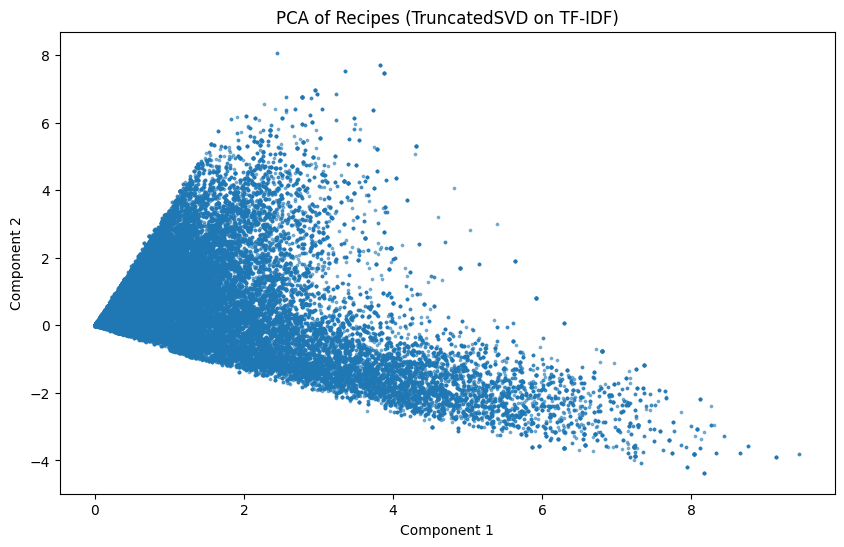

In [25]:
# MANUAL PCA (NO sklearn)

from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=2, random_state=42)
pca_result = svd.fit_transform(TFIDF)

plt.figure(figsize=(10,6))
plt.scatter(pca_result[:,0], pca_result[:,1], s=3, alpha=0.5)
plt.title("PCA of Recipes (TruncatedSVD on TF-IDF)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [26]:
#!pip install scikit-learn

import sklearn
print(sklearn.__version__)



1.7.2


In [27]:
# MANUAL K-MEANS (NUMPY ONLY)

from scipy.sparse import issparse

def kmeans_numpy(X, k=10, max_iter=20, random_state=42):
    """
    Manual K-Means that supports both dense (NumPy) and sparse (SciPy) matrices.

    Parameters:
        X : np.ndarray or scipy.sparse matrix
            Input data (n_samples x n_features)
        k : int
            Number of clusters
        max_iter : int
            Maximum iterations
        random_state : int
            Random seed for reproducibility

    Returns:
        labels : np.ndarray
            Cluster assignments for each sample
        centroids : np.ndarray
            Final cluster centroids (dense)
    """
    n_samples, n_features = X.shape
    rng = np.random.default_rng(random_state)

    # Randomly initialize centroids
    initial_idx = rng.choice(n_samples, size=k, replace=False)
    if issparse(X):
        centroids = X[initial_idx].toarray()  # convert only selected rows
    else:
        centroids = X[initial_idx]

    for _ in range(max_iter):
        if issparse(X):
            # Efficient distance computation for sparse matrices
            X_norms = np.array(X.multiply(X).sum(axis=1)).flatten()
            C_norms = np.sum(centroids ** 2, axis=1)
            distances = np.sqrt(
                X_norms[:, None] + C_norms[None, :] - 2 * X.dot(centroids.T)
            )
        else:
            # Regular dense computation
            distances = np.sqrt(((X[:, None, :] - centroids[None, :, :]) ** 2).sum(axis=2))

        labels = distances.argmin(axis=1)

        # Update centroids
        new_centroids = np.zeros_like(centroids)
        for i in range(k):
            mask = labels == i
            if np.any(mask):
                if issparse(X):
                    new_centroids[i] = X[mask].mean(axis=0)
                else:
                    new_centroids[i] = X[mask].mean(axis=0)
            else:
                # Handle empty cluster by reinitializing randomly
                new_centroids[i] = X[rng.choice(n_samples)].toarray().flatten() if issparse(X) else X[rng.choice(n_samples)]

        # Check for convergence
        if np.allclose(new_centroids, centroids):
            break
        centroids = new_centroids

    return labels, centroids

C:\Users\shree\AppData\Local\Temp\ipykernel_34028\1683924682.py:40: RuntimeWarning: invalid value encountered in sqrt
  distances = np.sqrt(



Cluster counts:
cluster
2    60085
6     1988
8       17
7       10
5        9
1        6
4        4
9        3
0        2
3        2
Name: count, dtype: int64


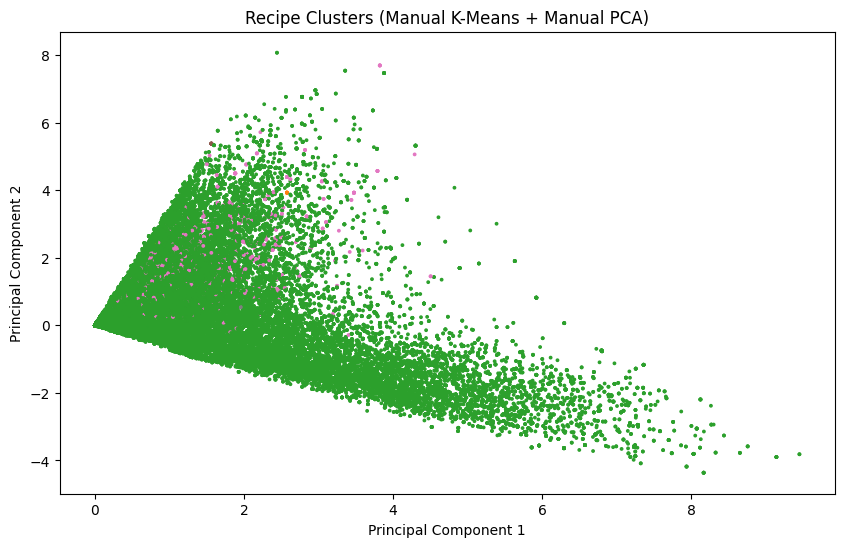

In [ ]:
labels, centroids = kmeans_numpy(TFIDF, k=10)
df["cluster"] = labels

print("/nCluster counts:")
print(df["cluster"].value_counts())

plt.figure(figsize=(10,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=labels, s=3, cmap="tab10")
plt.title("Recipe Clusters (Manual K-Means + Manual PCA)")
plt.xlabel("Principal Component 1")   # X-axis label
plt.ylabel("Principal Component 2")   # Y-axis label
plt.show()

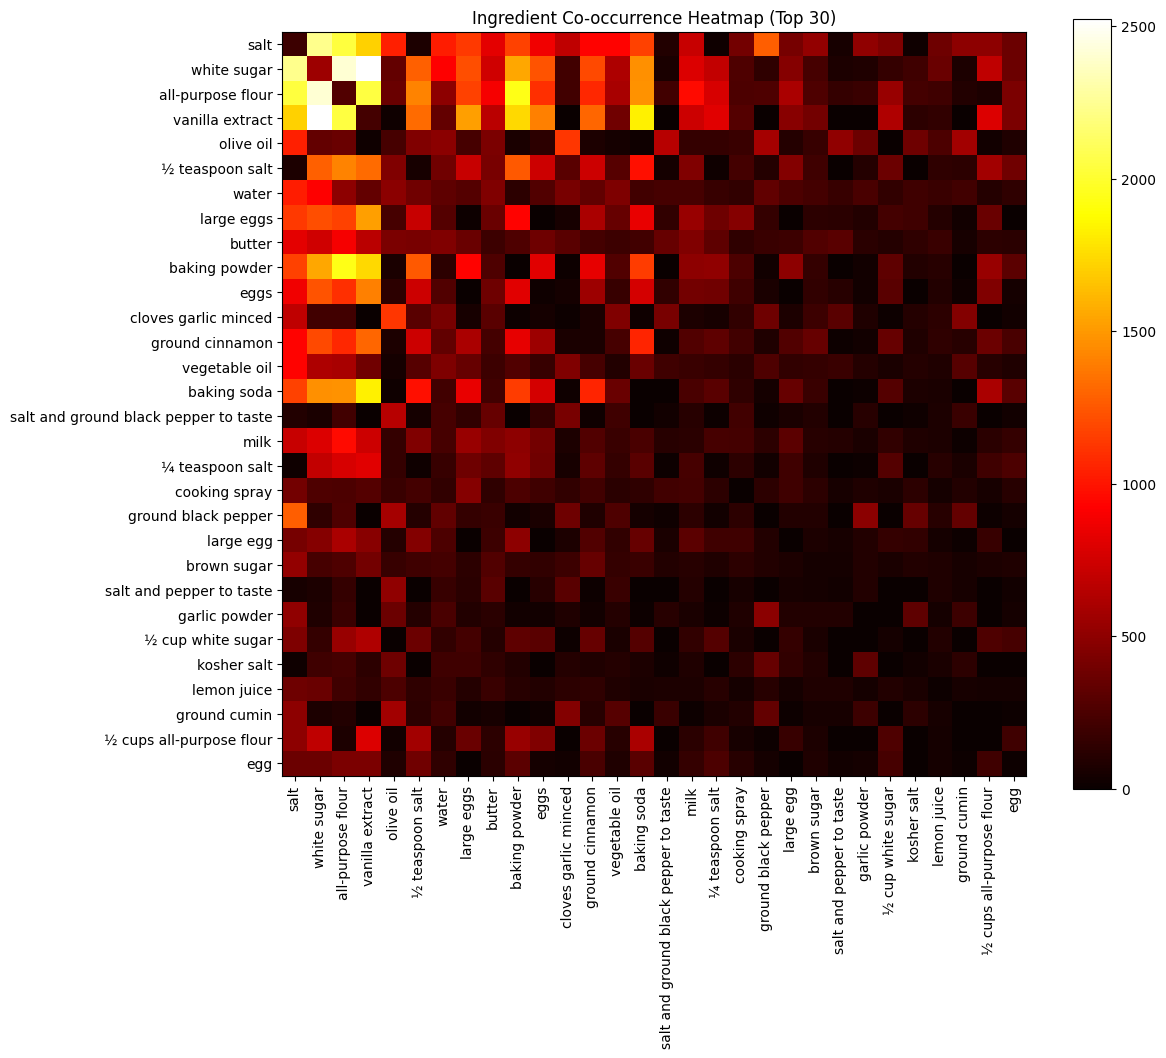

In [29]:
# INGREDIENT CO-OCCURRENCE MATRIX

from scipy.sparse import lil_matrix

cooc = lil_matrix((num_terms, num_terms), dtype=np.int32)

for ing_list in recipes:
    idxs = [vocab_index[i] for i in ing_list]
    for i in range(len(idxs)):
        for j in range(i+1, len(idxs)):
            cooc[idxs[i], idxs[j]] += 1
            cooc[idxs[j], idxs[i]] += 1

top30 = freq.head(30).index.tolist()
top_idx = [vocab_index[i] for i in top30]
submatrix = cooc[top_idx, :][:, top_idx].toarray()  # convert only this part to dense

plt.figure(figsize=(12,10))
plt.imshow(submatrix, cmap="hot")
plt.colorbar()
plt.xticks(range(30), top30, rotation=90)
plt.yticks(range(30), top30)
plt.title("Ingredient Co-occurrence Heatmap (Top 30)")
plt.show()            

## Fuzzy code

In [34]:
import pandas as pd
import re

# -------------------------------
# LOAD CSV
# -------------------------------
file_path = r"C:\Users\shree\Downloads\deduplicated_recipes.csv"
df = pd.read_csv(file_path)

if 'normalized_ingredients' not in df.columns:
    raise ValueError("Column 'normalized_ingredients' not found!")

# -------------------------------
# INGREDIENT NORMALIZATION MAP
# Keys: regex pattern (word-boundary safe)
# Values: canonical form
# Sorted manually from specific → general
# -------------------------------
ingredient_map = {
    # Proteins
    r'\b(chicken\s+wings?|wings)\b': 'chicken',
    r'\bchicken\b': 'chicken',
    r'\bbeef\b': 'beef',
    r'\bsteak\b': 'steak',
    r'\bpork\b': 'pork',
    r'\bbacon\b': 'bacon',
    r'\bham\b': 'ham',
    r'\bsausage\b': 'sausage',
    r'\bshrimp\b': 'shrimp',
    r'\bsalmon\b': 'salmon',
    r'\btuna\b': 'tuna',
    r'\bcod\b': 'cod',
    r'\btilapia\b': 'tilapia',
    r'\btofu\b': 'tofu',
    r'\begg(s)?\b': 'egg',

    # Seafood
    r'\bcrab\b': 'crab',
    r'\blobster\b': 'lobster',
    r'\bscallops\b': 'scallops',
    r'\bmussels\b': 'mussels',
    r'\bclams\b': 'clams',

    # Cheeses (distinct)
    r'\bmozzarella\b': 'mozzarella',
    r'\bparmesan\b': 'parmesan',
    r'\bcheddar\b': 'cheddar',
    r'\bfeta\b': 'feta',
    r'\bhalloumi\b': 'halloumi',
    r'\bricotta\b': 'ricotta',
    r'\bcream\s+cheese\b': 'cream cheese',
    r'\bcottage\s+cheese\b': 'cottage cheese',
    r'\bgoat\s+cheese\b': 'goat cheese',
    r'\bswiss\b': 'swiss',
    r'\bprovolone\b': 'provolone',
    r'\bgouda\b': 'gouda',
    r'\bblue\s+cheese\b': 'blue cheese',
    r'\bmonterey\s+jack\b': 'monterey jack',
    r'\bpepper\s+jack\b': 'pepper jack',
    r'\bcheese\b': 'cheese',  # fallback

    # Vegetables (specific)
    r'\brusset\s+potato(es)?\b': 'potato',
    r'\byukon\s+gold\s+potato\b': 'potato',
    r'\bsweet\s+potato\b': 'sweet potato',
    r'\bpotato(es)?\b': 'potato',
    r'\byam\b': 'yam',
    r'\bonion(s)?\b': 'onion',
    r'\b(green\s+onion|scallion)\b': 'onion',
    r'\bgarlic\b': 'garlic',
    r'\bcarrot(s)?\b': 'carrot',
    r'\bcelery\b': 'celery',
    r'\btomato(es)?\b': 'tomato',
    r'\b(bell\s+pepper|bell+pepper+any+color)\b': 'bell pepper',
    r'\bjalapeno\b': 'jalapeno',
    r'\bserrano\b': 'serrano',
    r'\bhabanero\b': 'habanero',
    r'\bmushroom(s)?\b': 'mushroom',
    r'\bspinach\b': 'spinach',
    r'\bkale\b': 'kale',
    r'\bbroccoli\b': 'broccoli',
    r'\bcauliflower\b': 'cauliflower',
    r'\bcorn\b': 'corn',
    r'\bcabbage\b': 'cabbage',
    r'\blettuce\b': 'lettuce',
    r'\bcucumber\b': 'cucumber',
    r'\bzucchini\b': 'zucchini',
    r'\beggplant\b': 'eggplant',
    r'\basparagus\b': 'asparagus',
    r'\bbrussels\s+sprouts\b': 'brussels sprouts',
    r'\bbeet(s)?\b': 'beet',
    r'\b(avocado\s)\b': 'avocado', # Note: This maps to 'avocado', separate from 'avocado oil'
    r'\b(chopped+cilantro|cilantro)\b': 'cilantro',


    # Fruits
    r'\bstrawberr(y|ies)\b': 'strawberry',
    r'\bblueberr(y|ies)\b': 'blueberry',
    r'\braspberr(y|ies)\b': 'raspberry',
    r'\bblackberr(y|ies)\b': 'blackberry',
    r'\bmango\b': 'mango',
    r'\bapple\b': 'apple',
    r'\b(banana\s)\b': 'banana',
    r'\blemon\b': 'lemon',
    r'\blime\b': 'lime',
    r'\borange\b': 'orange',
    r'\bpeach\b': 'peach',
    r'\bpear\b': 'pear',
    r'\bpineapple\b': 'pineapple',
    r'\bcranberr(y|ies)\b': 'cranberry',
    r'\b(pomegranate\s juice|pomegranate\s|fresh+pomegranate+aril)\b': 'pomegranate',
    

    # Legumes
    r'\bblack\s+bean\b': 'black bean',
    r'\bkidney\s+bean\b': 'kidney bean',
    r'\bpinto\s+bean\b': 'pinto bean',
    r'\bchickpea\b': 'chickpea',
    r'\blentil\b': 'lentil',

    # Fats & Oils
    # --- MODIFIED: Specific oils map to specific canonical forms, including specific sprays
    r'\b(extra\s+virgin\s+olive\s+oil|olive\s+oil\s+cooking\s+spray|olive\s+oil)\b': 'olive oil',
    r'\bcoconut\s+oil\b': 'coconut oil',
    r'\bsesame\s+oil\b': 'sesame oil',
    r'\bavocado\s+oil\b': 'avocado oil',
    r'\bpeanut\s+oil\b': 'peanut oil',
    # --- MODIFIED: General 'oil' must not be preceded by specific oil names, and must not be followed by 'oil' or 'spray'
    r'\b(nonstick+cooking+spray|cooking+spray)\b': 'oil',
    r'\boil\b(?!(\s+oil|\s+spray|\s+virgin))': 'oil', # Negative lookahead for oil followed by specific oil terms
    # r'\b(?<!olive\s|coconut\s|sesame\s|avocado\s|peanut\s)oil\b(?!(\s+oil|\s+spray|\s+virgin))': 'oil', # (More complex: Negative lookbehind for specific oil names)
    r'\bbutter\b': 'butter',
    r'\bghee\b': 'ghee',

    # Seasonings & Condiments
    r'\b(everything\s+bagel\s+seasoning|cajun\s+seasoning|creole\s+seasoning|italian\s+seasoning|montreal\s+steak\s+seasoning|seafood\s+seasoning|steak\s+rub)\b': 'seasoning',
    r'\bseasoning\b': 'seasoning',
    r'\b(gochnjang|gochujang)\b': 'gochujang',
    r'\b(sriracha|riracha)\b': 'sriracha',
    r'\bsoy\s+sauce\b': 'soy sauce',
    r'\bworcestershire\b': 'worcestershire sauce',
    r'\bketchup\b': 'ketchup',
    r'\bmayonnaise\b': 'mayonnaise',
    r'\bmustard\b': 'mustard',
    r'\bdijon\b': 'dijon',
    r'\bhot\s+sauce\b': 'hot sauce',
    r'\bteriyaki\b': 'teriyaki',
    r'\bfish\s+sauce\b': 'fish sauce',
    r'\bthai+sweet+chili+sauce\b': 'sweet chili sauce',

    # Salt, Pepper, Spices
    r'\b(salt|sea\s+salt|kosher\s+salt|pretzel\s+salt)\b': 'salt',
    r'\b(pepper|black\s+pepper|freshly+ground+black+pepper|black+pepper+divided)\b': 'black pepper',
    r'\b(white\s+pepper)\b': 'white pepper',
    r'\b(cayenne|red\s+pepper\s+flakes)\b': 'cayenne',
    r'\b(red\s+pepper\s+flakes)\b': 'red pepper',
    r'\bcinnamon\b': 'cinnamon',
    r'\bcumin\b': 'cumin',
    r'\bpaprika\b': 'paprika',
    r'\bturmeric\b': 'turmeric',
    r'\bginger\b': 'ginger',
    r'\bgarlic\s+powder\b': 'garlic',
    r'\bonion\s+powder\b': 'onion',
    r'\bdried+thyme\b': 'thyme',
    r'\b(dried+parsley|freshly+parsley)\b': 'parsley',
    r'\b(chili+powder)\b': 'chili powder',
    r'\b(crosemary+sprig+for+garnish|rosemary\s)\b': 'rosemary',
    r'\b(elderflower+liqueur)\b': 'elderflower liqueur',
    r'\b(prosecco)\b': 'prosecco',
    r'\b(beer|german+dark+beer|bottles+beer|can+beer)\b': 'beer',
    
    
    # Pantry
    r'\bsugar\b': 'sugar',
    r'\b(brown\s+sugar|white\s+sugar|granulated\s+sugar|confectioners\s+sugar|powdered\s+sugar)\b': 'sugar',
    r'\bhoney\b': 'honey',
    r'\bmaple\s+syrup\b': 'maple syrup',
    r'\bvinegar\b': 'vinegar',
    r'\b(balsamic\s+vinegar|apple\s+cider\s+vinegar|rice\s+vinegar|white\s+vinegar)\b': 'vinegar',
    r'\bwater\b': 'water',
    r'\bbroth\b': 'broth',
    r'\bstock\b': 'broth',
    r'\bmilk\b': 'milk',
    r'\bcream\b': 'cream',
    r'\bsour\s+cream\b': 'sour cream',
    r'\byogurt\b': 'yogurt',
    r'\b(chocolate+candy+bars|chocolate\s)\b': 'chocolate',
    r'\b(s+more+sized+marshmallows|marshmallows)\b': 'marshmallows',
    r'\b(chai+tea+bags|tea+bags|tea\s)\b': 'tea',
    r'\bkefir\b': 'kefir',
    r'\bcaramel\s+syrup\b': 'caramel syrup',
    r'\bvanilla+extract\b': 'vanilla extract',

    

    # Grains & Baking
    r'\b(flour|all\s+purpose\s+flour|cake\s+flour|whole\s+wheat\s+flour)\b': 'flour',
    r'\brice\b': 'rice',
    r'\bpasta\b': 'pasta',
    r'\bbread\b': 'bread',
    r'\bdough\b': 'dough',
    r'\boats\b': 'oats',
    r'\b(rolled\s+oats|quick\s+oats)\b': 'oats',
    r'\bbaking\s+soda\b': 'baking soda',
    r'\bbaking\s+powder\b': 'baking powder',
    r'\bshortening\b': 'shortening',
    r'\bmargarine\b': 'margarine',
    r'\bchocolate\s+chips\b': 'chocolate chips',
    r'\bcocoa\s+powder\b': 'cocoa powder',
    r'\b(panko+bread+crumbs|bread+crumbs)\b': 'breadcrumbs',
    r'\b(hot+dog+buns)\b': 'hot dog buns',
    r'\b(uncooked+bratwurst|bratwurst)\b': 'bratwurst',
    
    
}

# Compile patterns
compiled_rules = [(re.compile(pattern, re.IGNORECASE), canonical) for pattern, canonical in ingredient_map.items()]

# -------------------------------
# NORMALIZATION FUNCTION
# -------------------------------
def clean_ingredients(text):
    if pd.isna(text) or not str(text).strip():
        return ''
    text = str(text).lower()
    found = set()

    # 1. Populate initial set of canonical ingredients
    for pattern, canonical in compiled_rules:
        if pattern.search(text):
            found.add(canonical)

    # --- POST-PROCESSING FILTERING START (Addressing user's request) ---
    
    # Rule 1: If 'olive oil' is present, remove generic 'oil'
    if 'olive oil' in found:
        found.discard('oil')

    # Rule 2: If 'avocado oil' is present, remove 'avocado' 
    if 'avocado oil' in found:
        found.discard('avocado')
    
    # --- POST-PROCESSING FILTERING END ---

    # Always return all found, sorted and joined
    return ', '.join(sorted(found))

# -------------------------------
# APPLY & SAVE
# -------------------------------
print("Cleaning ingredients...")
df['cleaned_ingredients_filtered'] = df['normalized_ingredients'].apply(clean_ingredients)

output_path = r"C:\Users\shree\Downloads\deduplicated_recipes_cleaned.csv"
df.to_csv(output_path, index=False)
print(f"✅ Done! Fixed version saved to:\n{output_path}")

Cleaning ingredients...
✅ Done! Fixed version saved to:
C:\Users\shree\Downloads\deduplicated_recipes_cleaned.csv


In [44]:
import pandas as pd
import numpy as np

# -----------------------------------
# 1. LOAD THE DATA CONTAINING NaN VALUES
# This file contains the 'cleaned_ingredients_filtered' column where the 
# original blanks ('') have already been converted to np.nan.
# -----------------------------------
file_path = r"C:\Users\shree\Downloads\deduplicated_recipes_filtered.csv"

# In case the file is missing, we re-create the NaN state from the previous file
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    # If the exact file is missing, load the file with the '' blanks and convert them
    df = pd.read_csv("deduplicated_recipes_filtered.csv")
    df['cleaned_ingredients_filtered'].replace('', np.nan, inplace=True)


# -----------------------------------
# 2. DELETE ROWS USING dropna() (THE CODE)
# -----------------------------------

# Drop rows where 'cleaned_ingredients_filtered' has an NaN value.
df_dropped = df.dropna(subset=['cleaned_ingredients_filtered'])

# -----------------------------------
# 3. SAVE THE RESULT
# -----------------------------------
print("Cleaning ingredients...")
df['cleaned_ingredients_filtered'] = df['normalized_ingredients'].apply(clean_ingredients)

output_path = r"C:\Users\shree\Downloads\deduplicated_recipes_filtered.csv"
df.to_csv(output_path, index=False)
print(f"✅ Done! Fixed version saved to:\n{output_path}")




Cleaning ingredients...
✅ Done! Fixed version saved to:
C:\Users\shree\Downloads\deduplicated_recipes_filtered.csv


In [45]:
## Complexity column added

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('deduplicated_recipes_filtered.csv')

# Ensure the columns are numeric and handle any non-numeric values
df['num_ingredients'] = pd.to_numeric(df['num_ingredients'], errors='coerce')
df['num_steps'] = pd.to_numeric(df['num_steps'], errors='coerce')

# Drop rows where essential columns are NaN after coercion
df.dropna(subset=['num_ingredients', 'num_steps'], inplace=True)

# 1. Calculate the Complexity Score
# Complexity Score = (num_ingredients + num_steps) / 2
df['Complexity Score'] = (df['num_ingredients'] + df['num_steps']) / 2

# 2. Define complexity categories based on quartiles of the 'Complexity Score'
# Simple: Score <= 5.0 (Q1)
# Medium: 5.0 < Score <= 8.0 (between Q1 and Q3)
# Complex: Score > 8.0 (Q3)

# Define the conditions and corresponding values
conditions = [
    (df['Complexity Score'] <= 5.0),
    (df['Complexity Score'] > 5.0) & (df['Complexity Score'] <= 8.0),
    (df['Complexity Score'] > 8.0)
]
choices = ['simple', 'medium', 'complex']

# 3. Create the 'Complexity' column using numpy.select
df['Complexity'] = np.select(conditions, choices, default='unknown')

# Save the updated DataFrame to a new CSV file
output_file = 'deduplicated_recipes_with_complexity.csv'
df.to_csv(output_file, index=False)